# Figure S7

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from matplotlib.ticker import FuncFormatter

import replay_structure.structure_models as models
import replay_structure.metadata as meta
import replay_structure.read_write as read_write

import importlib

In [2]:
SMALL_SIZE = 5
MEDIUM_SIZE = 6
BIGGER_SIZE = 7

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
ripple_data = dict()
for session in meta.Session_List:
    ripple_data[str(session)] =  read_write.load_spikemat_data(session, meta.Ripple_Data.default_time_window_ms, meta.Ripple_Data.name)

loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/ripples/rat1day1_4cm_3ms.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/ripples/rat1day2_4cm_3ms.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/ripples/rat2day1_4cm_3ms.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/ripples/rat2day2_4cm_3ms.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/ripples/rat3day1_4cm_3ms.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/ripples/rat3day2_4cm_3ms.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/ripples/rat4day1_4cm_3ms.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/ripples/rat4day2_4cm_3ms.obj


In [4]:
# get SWR and popburst duration
ripple_lengths = np.array([])
popburst_lengths = np.array([])
for session in meta.Session_List:
    for i in range(len(ripple_data[str(session)].ripple_info['spikemats_fullripple'])):
        ripple_lengths = np.append(
            ripple_lengths, 
            ripple_data[str(session)].ripple_info['spikemats_fullripple'][i].shape[0] * ripple_data[str(session)].params.time_window_ms)
    for ripple in range(len(ripple_data[str(session)].ripple_info['spikemats_popburst'])):
        if ripple_data[str(session)].ripple_info['spikemats_popburst'][ripple] is not None:
            popburst_lengths = np.append(
                popburst_lengths, 
                ripple_data[str(session)].ripple_info['spikemats_popburst'][ripple].shape[0] * ripple_data[str(session)].params.time_window_ms)
# get SWR and popburst total spikes
ripple_total_spikes = np.array([])
popburst_total_spikes = np.array([])
for session in meta.Session_List:
    for i in range(len(ripple_data[str(session)].ripple_info['spikemats_fullripple'])):
        ripple_total_spikes = np.append(
            ripple_total_spikes, 
            ripple_data[str(session)].ripple_info['spikemats_fullripple'][i].sum())
    for ripple in range(len(ripple_data[str(session)].ripple_info['spikemats_popburst'])):
        if ripple_data[str(session)].ripple_info['spikemats_popburst'][ripple] is not None:
            popburst_total_spikes = np.append(
                popburst_total_spikes, 
                ripple_data[str(session)].ripple_info['spikemats_popburst'][ripple].sum())

In [5]:
def plot_spike_raster(spikemat, ax=None):
    spikes = np.argwhere(spikemat.T)
    for spike in spikes:
        ax.eventplot([spike[1]], lineoffsets=spike[0], orientation="horizontal", linelengths=6, linewidths=.5, color='black')

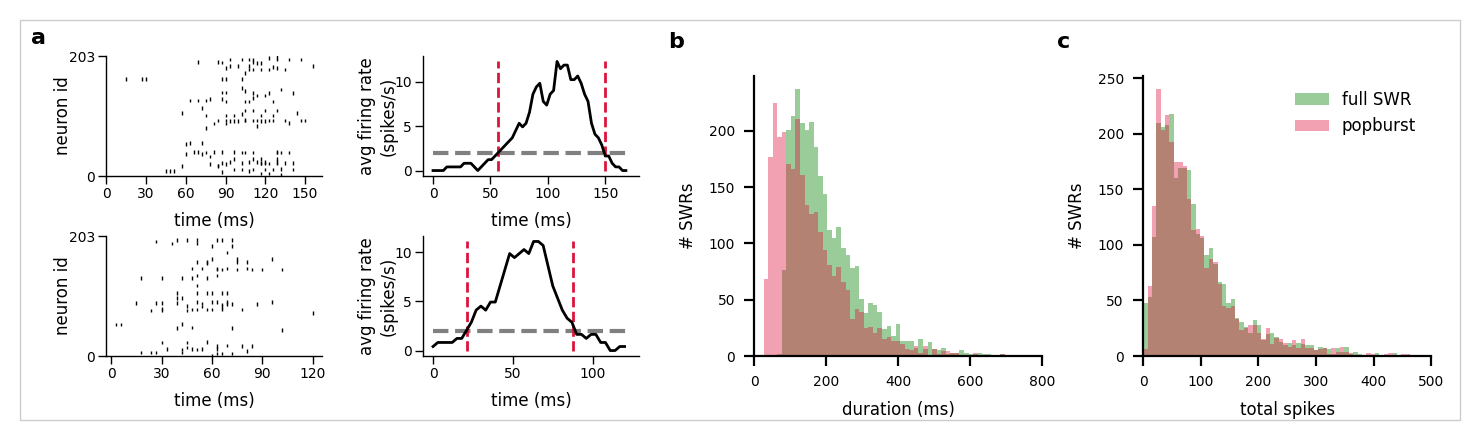

In [7]:
figure_width = 7.2 #6
figure_height = 2

left_margin = .06
right_margin = .05
footer = .16
w_spacing_a = .07
w_spacing_ab = .08
h_spacing = .15

spike_raster_width = .15
fr_trace_width = .15
distribution_width = .2
panel_height = .3

fig = plt.figure(figsize=(figure_width, figure_height), dpi=200, facecolor="w", edgecolor="k")
ax = dict()
panel_bottom = [footer, footer+panel_height+h_spacing]
for i in range(2):
    bottom = panel_bottom[i]
    left = left_margin
    ax[i, 0] = fig.add_axes(([left, bottom, spike_raster_width, panel_height]))
    left = left + spike_raster_width + w_spacing_a
    ax[i, 1] = fig.add_axes(([left, bottom, fr_trace_width, panel_height]))


bottom = footer
height = .7
left = left + fr_trace_width + w_spacing_ab
ax[1] = fig.add_axes(([left, bottom, distribution_width, height]))
left = left + distribution_width + w_spacing_a
ax[2] = fig.add_axes(([left, bottom, distribution_width, height]))
    

session = meta.Session_List[0]
session_ripple_data = ripple_data[str(session)]
ripples_plot = [21,148]
popburst_times = (session_ripple_data.ripple_info["popburst_times_s"] - np.array([session_ripple_data.data["ripple_times_s"][:,0],session_ripple_data.data["ripple_times_s"][:,0]]).T) * 1000
# i = 0

for i, ripple in enumerate(ripples_plot):
    full_spikemat = session_ripple_data.ripple_info['spikemats_fullripple'][ripple]
    plot_spike_raster(full_spikemat, ax=ax[i,0])
    ax[i,1].plot(np.arange(len(session_ripple_data.ripple_info["avg_spikes_per_s_smoothed"][ripple]))*meta.Ripple_Data.default_time_window_ms, 
               session_ripple_data.ripple_info["avg_spikes_per_s_smoothed"][ripple], color='black', linewidth=1)
    ax[i,1].hlines(session_ripple_data.params.popburst_avg_spikes_per_s_threshold, 
                 0, len(session_ripple_data.ripple_info["avg_spikes_per_s_smoothed"][ripple])*meta.Ripple_Data.default_time_window_ms, color='gray', linestyle='--')
    ax[i,1].vlines(popburst_times[ripple][0], 0, session_ripple_data.ripple_info["avg_spikes_per_s_smoothed"][ripple].max(), color='crimson', linestyle='--', linewidth=1)
    ax[i,1].vlines(popburst_times[ripple][1], 0, session_ripple_data.ripple_info["avg_spikes_per_s_smoothed"][ripple].max(), color='crimson', linestyle='--', linewidth=1)
    spikemat = session_ripple_data.ripple_info['spikemats_popburst'][ripple]
    ax[i,0].set_xticks(np.arange(0, full_spikemat.shape[0], 10))
    ax[i,0].set_xticklabels(np.arange(0, full_spikemat.shape[0], 10)*meta.Ripple_Data.default_time_window_ms)
    ax[i,0].set_yticks([0, full_spikemat.shape[1]])
    ax[i,0].set_xlabel("time (ms)")
    ax[i,1].set_xlabel("time (ms)")
    ax[i,0].set_ylabel("neuron id", labelpad=-1)
    ax[i,1].set_ylabel("avg firing rate\n(spikes/s)", labelpad=-1)
    ax[i,1].spines['top'].set_visible(False)
    ax[i,1].spines['right'].set_visible(False)
    ax[i,0].set_ylim([0,full_spikemat.shape[1]])
    ax[i,0].spines['top'].set_visible(False)
    ax[i,0].spines['right'].set_visible(False)
    ax[i,0].spines['left'].set_linewidth(.5)
    ax[i,0].spines['bottom'].set_linewidth(.5)
    ax[i,1].spines['left'].set_linewidth(.5)
    ax[i,1].spines['bottom'].set_linewidth(.5)
    ax[i,0].tick_params(axis='both', width=.5, length=3, pad=1)
    ax[i,1].tick_params(axis='both', width=.5, length=3, pad=1)
    


i = 1
bins = np.linspace(0,1000,80)
ax[i].hist(ripple_lengths, bins=bins, alpha=.4, label='full SWR', color='green')
ax[i].hist(popburst_lengths, bins=bins, alpha=.4, label='popburst', color='crimson')
ax[i].set_ylabel('# SWRs')
ax[i].set_xlabel('duration (ms)')
ax[i].spines['top'].set_visible(False)
ax[i].spines['right'].set_visible(False)
ax[i].set_xlim([0, 800])

i=2
bins = np.linspace(0,600,80)
ax[i].hist(ripple_total_spikes, bins=bins, alpha=.4, color='green', label='full SWR')
ax[i].hist(popburst_total_spikes, bins=bins, alpha=.4, color='crimson', label='popburst')
ax[i].set_ylabel('# SWRs')
ax[i].set_xlabel('total spikes')
ax[i].legend(frameon=False)
ax[i].spines['top'].set_visible(False)
ax[i].spines['right'].set_visible(False)
ax[i].set_xlim([0, 500])

ax[1,0].text(-.35,1.1, 'a', size=8, transform=ax[1,0].transAxes, fontweight='bold')
ax[1].text(-.3,1.1, 'b', size=8, transform=ax[1].transAxes, fontweight='bold')
ax[2].text(-.3,1.1, 'c', size=8, transform=ax[2].transAxes, fontweight='bold')

plt.savefig(os.path.join(meta.FIGURES_PATH, "FigureS7a-c.svg"), dpi=500, transparent=True)

rect = plt.Rectangle(
    # (lower-left corner), width, height
    (0, 0), 1, 1, fill=False, color="k", lw=.5, alpha=.2,
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])

plt.show()

## Relation Between Models

In [8]:
load_model_relation_results = True

In [9]:
session = meta.Session_List[0]
structure_data = read_write.load_structure_data(
    session, meta.Ripple_Data.default_time_window_ms, meta.Ripple_Data.name, meta.Ripple_Data.default_likelihood_function)

loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/structure_analysis_input/rat1day1_ripples_4cm_3ms_poisson.obj


In [10]:
ripples_trajectory_ex = [0, 35]
diffusion_model_ev = dict()

decay_array = np.logspace(0,3,30)
diffusion_sd = 1
momentum_sd_0 = diffusion_sd

for ripple in ripples_trajectory_ex:
    diffusion_model_ev[ripple] = models.Diffusion(structure_data, diffusion_sd).get_spikemat_model_evidence(ripple)

if load_model_relation_results:
    momentum_model_ev = read_write.load_data(os.path.join(meta.RESULTS_PATH, "ripples",  "trajectory_model_relations.obj"))
else:
    momentum_model_ev = dict()
    for ripple in ripples_trajectory_ex:
        momentum_model_ev[ripple] = np.zeros(len(decay_array)) 
        for i in range(len(decay_array)):
            momentum_sd = np.sqrt((2 * diffusion_sd**2 * decay_array[i]) / (meta.Ripple_Data.default_time_window_ms/1000))
            momentum_model_ev[ripple][i] = models.Momentum(structure_data, momentum_sd_0, momentum_sd, decay_array[i]).get_spikemat_model_evidence(ripple)

    print("\n", diffusion_model_ev, momentum_model_ev)

    read_write.save_data(momentum_model_ev, os.path.join(meta.RESULTS_PATH, "ripples",  "trajectory_model_relations.obj"))

loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/trajectory_model_relations.obj


In [11]:
ripples_nontrajectory_ex = [131, 8, 51]
stationary_model_ev = dict()
random_model_ev = dict()

sg_sd_array = np.logspace(-2.4, 1, 50)

for ripple in ripples_nontrajectory_ex:
    stationary_model_ev[ripple] = models.Stationary(structure_data).get_spikemat_model_evidence(ripple)
    random_model_ev[ripple] = models.Random(structure_data).get_spikemat_model_evidence(ripple)

if load_model_relation_results:
    sg_model_ev = read_write.load_data(os.path.join(meta.RESULTS_PATH, "ripples",  "nontrajectory_model_relations.obj"))
else:
    sg_model_ev = dict()
    for ripple in ripples_nontrajectory_ex:
        sg_model_ev[ripple] = np.zeros(len(sg_sd_array)) 
        for i in range(len(sg_sd_array)):
            sg_model_ev[ripple][i] = models.Stationary_Gaussian(structure_data, sg_sd_array[i]).get_spikemat_model_evidence(ripple)

        print("\n", stationary_model_ev, sg_model_ev)
        
    read_write.save_data(sg_model_ev, os.path.join(meta.RESULTS_PATH, "ripples",  "nontrajectory_model_relations.obj"))

loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/nontrajectory_model_relations.obj


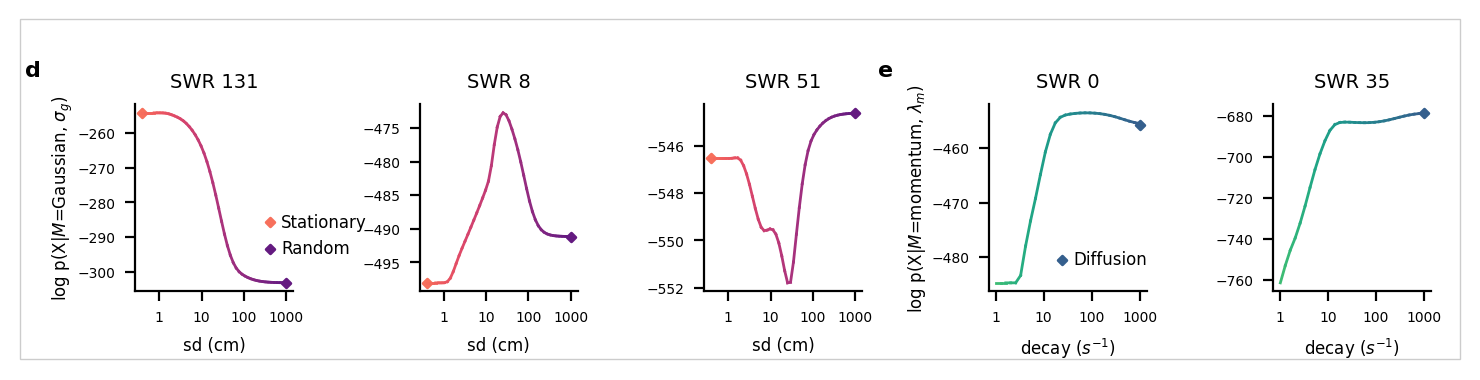

In [13]:
fig, ax = plt.subplots(1,5,figsize=(7.2,1.7), dpi=200)
plt.subplots_adjust(left=.08, bottom=0.2, wspace=.8, right=0.98, top=.75)#, hspace=.5, right = .8)

start_ind = 0
end_ind = len(sg_sd_array)
n_var_plot = end_ind-start_ind
x = np.arange(end_ind-start_ind)

cmap = matplotlib.cm.get_cmap('magma')
normalize = matplotlib.colors.Normalize(0,1)
color_vec = np.linspace(.7, .3, n_var_plot)
colors = [cmap(value) for value in color_vec]

for i in range(len(ripples_nontrajectory_ex)):
    ripple = ripples_nontrajectory_ex[i]
    for j in range(n_var_plot-1):
        ax[i].plot(sg_sd_array[j:j+2]*100,  sg_model_ev[ripple][start_ind:end_ind][j:j+2], c=colors[j+1], linewidth=1)
    ax[i].scatter(sg_sd_array[0]*100,  stationary_model_ev[ripple], label='Stationary', c=[colors[0]], s=5, marker="D")
    ax[i].scatter(sg_sd_array[-1]*100, random_model_ev[ripple], label='Random', c=[colors[-1]], s=5, marker="D")
    ax[i].set_xlabel('sd (cm)')
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    
    ax[i].set_title(f'SWR {ripple}', fontsize=7)
    if i ==0 :
        ax[i].legend(loc=0,frameon=False, bbox_to_anchor=(.65,.5,0,0), handletextpad=-.3)
        ax[i].set_ylabel('log p(X|$M$=Gaussian, $\sigma_g$)', labelpad=1)
    ax[i].set_xscale('log')
    ax[i].set_xticks([1, 10, 100, 1000])
    formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
    ax[i].xaxis.set_major_formatter(formatter)
        
start_ind = 0
end_ind = len(decay_array)
n_var_plot = end_ind-start_ind
x = np.arange(end_ind-start_ind)

cmap = matplotlib.cm.get_cmap('viridis')
normalize = matplotlib.colors.Normalize(0,1)
color_vec = np.linspace(.7, .3, n_var_plot)
colors = [cmap(value) for value in color_vec]

for i in range(len(ripples_trajectory_ex)):
    ripple = ripples_trajectory_ex[i]
    k = i+3
    for j in range(n_var_plot-1):
        ax[k].plot(decay_array[j:j+2],  momentum_model_ev[ripple][start_ind:end_ind][j:j+2], c=colors[j+1], linewidth=1)
    ax[k].scatter(decay_array[-1], diffusion_model_ev[ripple], label='Diffusion', c=[colors[-1]], s=5, marker="D")
    ax[k].set_xlabel('decay ($s^{-1}$)')
    ax[k].spines["top"].set_visible(False)
    ax[k].spines["right"].set_visible(False)
    
    ax[k].set_title(f'SWR {ripple}', fontsize=7)
    if i ==0 :
        ax[k].legend(loc=0, frameon=False, bbox_to_anchor=(1.1,.3,0,0), handletextpad=-.3)
        ax[k].set_ylabel('log p(X|$M$=momentum, $\lambda_m$)', labelpad=1)
    ax[k].set_xscale('log')
    ax[k].set_xticks([1, 10, 100, 1000])
    formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
    ax[k].xaxis.set_major_formatter(formatter)


ax[0].text(-.7,1.15, 'd', size=8, transform=ax[0].transAxes, fontweight='bold')
ax[3].text(-.7,1.15, 'e', size=8, transform=ax[3].transAxes, fontweight='bold')

plt.savefig(os.path.join(meta.FIGURES_PATH, "FigureS7de-e.svg"), dpi=500, transparent=True)

rect = plt.Rectangle(
    # (lower-left corner), width, height
    (0, 0), 1, 1, fill=False, color="k", lw=.5, alpha=.2,
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])

plt.show()